https://github.com/sflydatascience/homework1

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 1000)

# Explore Online

#### Basic Data Quality Checks and Summary

In [196]:
online = pd.read_csv('data/online.csv')

In [197]:
online['dt'] = pd.to_datetime(online['dt'])

In [198]:
online.head()

,session,visitor,dt,custno,category,event1,event2
0,419542,140970,2016-09-16 05:03:23,3840,1,NaN,1
1,3030130,14501,2017-11-13 04:58:12,70400,1,NaN,1
2,2638740,419353,2017-05-24 16:10:38,21248,1,NaN,1
3,880408,90673,2017-10-28 13:42:38,39168,1,NaN,1
4,2612179,191542,2016-05-17 06:30:32,47616,1,NaN,1


In [199]:
online.isna().sum()

session          0
visitor          0
dt               0
custno           0
category         0
event1      789846
event2           0
dtype: int64

In [200]:
online.isna().sum()

session          0
visitor          0
dt               0
custno           0
category         0
event1      789846
event2           0
dtype: int64

#### Number of Sessions by Day of Week

In [208]:
online.head()

,session,visitor,dt,custno,category,event1,event2,DOW
0,419542,140970,2016-09-16 05:03:23,3840,1,NaN,1,4
1,3030130,14501,2017-11-13 04:58:12,70400,1,NaN,1,0
2,2638740,419353,2017-05-24 16:10:38,21248,1,NaN,1,2
3,880408,90673,2017-10-28 13:42:38,39168,1,NaN,1,5
4,2612179,191542,2016-05-17 06:30:32,47616,1,NaN,1,1


In [205]:
online['DOW'] = online['dt'].dt.dayofweek
unique_sessions = online[['DOW', 'session']].drop_duplicates()
sessions_by_dow = unique_sessions.groupby('DOW').count()

In [209]:
sessions_by_dow.index = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]

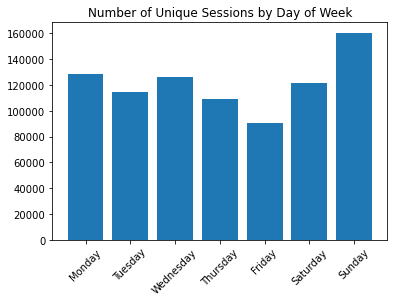

In [215]:
plt.title('Number of Unique Sessions by Day of Week')
plt.bar(sessions_by_dow.index, sessions_by_dow['session'])
plt.xticks(rotation=45)
plt.show()

#### Number of Sessions By Day

In [70]:
online['date'] = online['dt'].dt.date
unique_sessions = online[['date', 'session']].drop_duplicates()
sessions_per_day = unique_sessions.groupby('date').count()

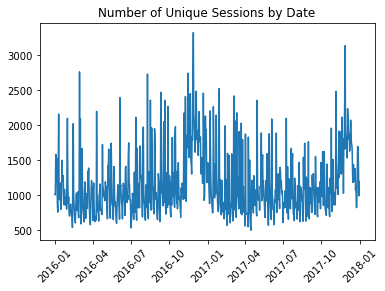

In [81]:
plt.plot(sessions_per_day)
plt.title('Number of Unique Sessions by Date')
plt.xticks(rotation=45)
plt.show()

#### Distince Customers

#### Evaluate Event 1

In [43]:
event_1_counts = online.groupby('event1').count()['session']

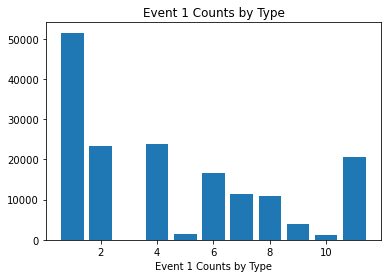

In [46]:
plt.bar(event_1_counts.index, event_1_counts)
plt.title('Event 1 Counts by Type')
plt.xlabel('Event 1 Counts by Type')
plt.show()

#### Evaluate Event 2

In [50]:
event_2_counts = online.groupby('event2').count()['session']

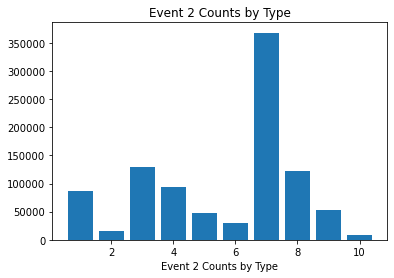

In [51]:
plt.bar(event_2_counts.index, event_2_counts)
plt.title('Event 2 Counts by Type')
plt.xlabel('Event 2 Counts by Type')
plt.show()

# Explore order.csv

In [227]:
order = pd.read_csv('data/order.csv')

In [228]:
def prod_cat2_nan_fill(prd_cat1, prd_cat2):
    if np.isnan(prd_cat2):
        return -1*prd_cat1
    else:
        return prd_cat2

def test_prod_cat2_nan_fill():
    in_data = [
        [1,np.nan],
        [2,np.nan],
        [3,199],
        [1,2]
    ]
    obs = [prod_cat2_nan_fill(x[0], x[1]) for x in in_data]
    exp = [-1,-2, 199, 2]
    assert obs == exp, f'obs:{obs}, exp:{exp}'

test_prod_cat2_nan_fill()

In [229]:
order['prodcat2'] = order[['prodcat1', 'prodcat2']].apply(
    lambda row: prod_cat2_nan_fill(row['prodcat1'], row['prodcat2']), axis=1
)

#### Clean Up Dates

In [125]:
order['orderdate'] = pd.to_datetime(order['orderdate'])
order['order_year_month'] = order['orderdate'].dt.to_period('M')
order['order_year_month'] = order['order_year_month'].apply(lambda dt: dt.to_timestamp())

#### Check Primary Key

In [234]:
order.shape

(263278, 6)

In [241]:
order

,custno,ordno,orderdate,prodcat2,prodcat1,revenue
0,18944,64694,2016-11-27 20:57:20,-1.0,1,53.30
1,18944,114405,2017-04-29 20:18:04,-1.0,1,0.10
2,18944,28906,2017-04-23 21:31:03,-1.0,1,141.66
3,36096,62681,2016-02-25 07:16:33,-1.0,1,36.82
4,1,1,2017-06-12 08:27:59,-1.0,1,8.35
...,...,...,...,...,...,...
263273,7443,99084,2018-09-23 16:02:08,253.0,1,6.67
263274,6693,8660,2017-06-08 21:37:34,253.0,1,122.98
263275,22914,36144,2017-05-12 14:07:18,253.0,1,143.34
263276,36088,62664,2018-03-11 20:19:18,253.0,1,49.75


In [245]:
order[['ordno','prodcat2', 'revenue']].drop_duplicates().shape

(263278, 3)

#### Distribution of Revenue by Category 

In [9]:
order.groupby('prodcat1').agg('describe')['revenue']

,count,mean,std,min,25%,50%,75%,max
prodcat1,,,,,,,,
1,48672.0,74.880807,43.219422,0.00,37.0700,75.120,112.00,150.0
2,88684.0,75.208527,43.299121,0.00,37.7600,75.255,112.62,150.0
3,44019.0,74.747437,43.192556,0.01,37.3400,74.610,112.00,150.0
4,46681.0,74.653734,43.349344,0.00,37.1400,74.550,112.11,150.0
5,11180.0,75.676608,43.065655,0.00,38.7975,75.685,112.90,150.0
7,24042.0,74.627529,43.420142,0.01,36.8425,74.180,112.22,150.0


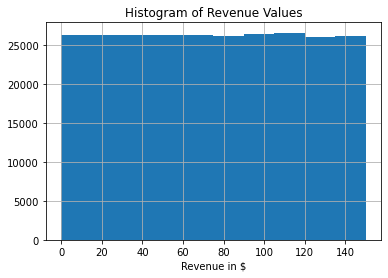

In [12]:
order['revenue'].hist()
plt.title('Histogram of Revenue Values')
plt.xlabel('Revenue in $')
plt.show()

#### Orders of Prodcat1 by date

In [126]:
orders_by_date_and_cat1_long = order.groupby(
    ['order_year_month', 'prodcat1'], as_index=False
).count()[
    ['order_year_month', 'prodcat1', 'ordno']
]

In [127]:
orders_by_date_and_cat1 = orders_by_date_and_cat1_long.pivot(
    index='order_year_month', columns='prodcat1', values='ordno'
)

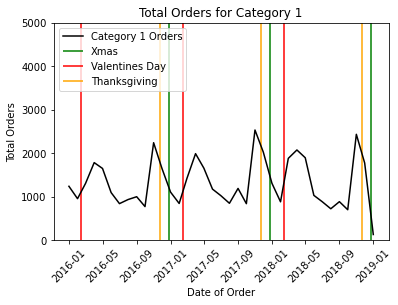

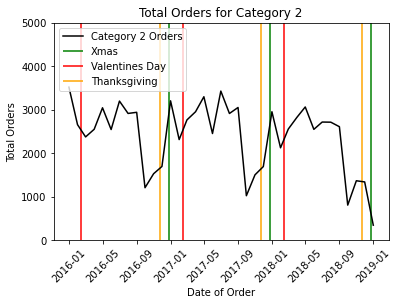

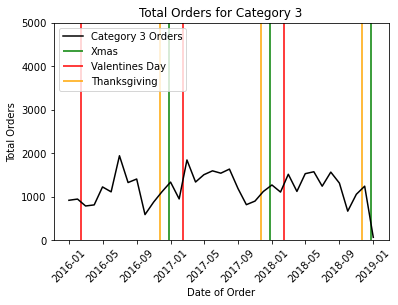

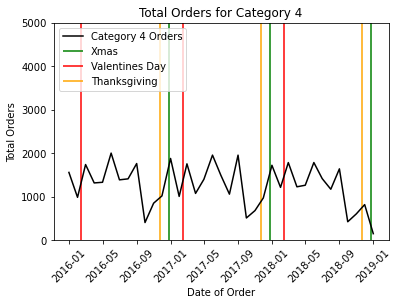

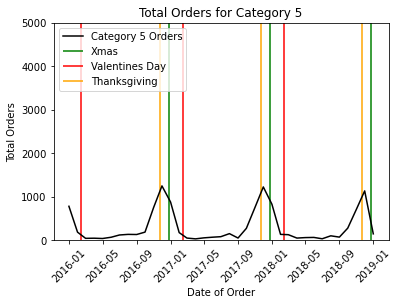

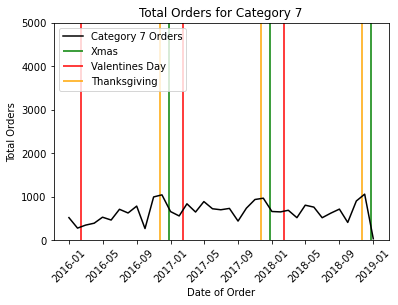

In [175]:
for i in [1,2,3,4,5,7]:
    plt.plot(
        orders_by_date_and_cat1.index, 
        orders_by_date_and_cat1[i], 
        label=f'Category {i} Orders',
        color='black'
    )
    plt.title(f'Total Orders for Category {i}')
    plt.xticks(rotation=45)
    plt.ylabel('Total Orders')
    plt.xlabel('Date of Order')
    plt.vlines([
        pd.to_datetime('12-25-2016'), pd.to_datetime('12-25-2017'), pd.to_datetime('12-25-2018')
    ],0,5000, colors='Green', label='Xmas')
    plt.vlines([
        pd.to_datetime('2-14-2016'), pd.to_datetime('2-14-2017'), pd.to_datetime('2-14-2018')
    ],0,5000, colors='red', label='Valentines Day')
    plt.vlines([
        pd.to_datetime('11-24-2016'), pd.to_datetime('11-23-2017'), pd.to_datetime('11-22-2018')
    ],0,5000, colors='Orange', label='Thanksgiving')
    plt.ylim(0,5000)
    plt.legend(loc='upper left')
    plt.show()

# Pair-wise Directed Graph of Items

In [246]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#### Convert into pairs

In [ ]:
order

In [193]:
order.head()

,custno,ordno,orderdate,prodcat2,prodcat1,revenue,date,order_year_month,null_cat2
0,18944,64694,2016-11-27 20:57:20,-1.0,1,53.30,2016-11-27,2016-11-01,True
1,18944,114405,2017-04-29 20:18:04,-1.0,1,0.10,2017-04-29,2017-04-01,True
2,18944,28906,2017-04-23 21:31:03,-1.0,1,141.66,2017-04-23,2017-04-01,True
3,36096,62681,2016-02-25 07:16:33,-1.0,1,36.82,2016-02-25,2016-02-01,True
4,1,1,2017-06-12 08:27:59,-1.0,1,8.35,2017-06-12,2017-06-01,True


In [ ]:
order.groupby()

#### Which Products Tend to be Purchased Together

In [ ]:
G.add_edges_from()

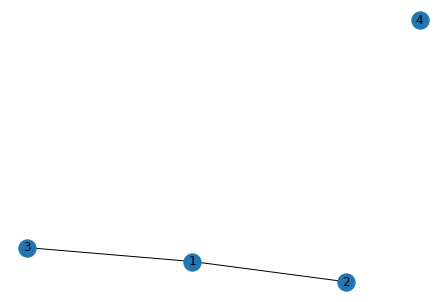

In [181]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_node(4, size=100, weight=.1)
nx.draw(G, with_labels=True)
plt.show()

# Junk Below

In [25]:
n_records_by_session = online.groupby('session').count()[['custno', 'visitor']]

In [34]:
online[online['session'] == 72733]

,session,visitor,dt,custno,category,event1,event2
228862,72733,309625,2017-01-29 09:57:22,59156,3,NaN,3
333791,72733,309625,2017-01-29 09:44:33,59156,3,NaN,4
464634,72733,309625,2017-01-29 09:14:43,59156,3,NaN,7
656378,72733,309625,2017-01-29 09:18:36,59156,3,NaN,8
749829,72733,309625,2017-01-29 09:46:58,59156,3,NaN,9


In [33]:
n_records_by_session[n_records_by_session['custno']>4]

,custno,visitor
session,,
72733,5,5
157423,5,5
161973,5,5
692928,5,5
811699,5,5
1178030,5,5
1564273,5,5
1588057,5,5
1635458,5,5


In [14]:
online[online['session']==3030130]

,session,visitor,dt,custno,category,event1,event2
1,3030130,14501,2017-11-13 04:58:12,70400,1,NaN,1


In [11]:
online.groupby('category').count()

,session,visitor,dt,custno,event1,event2
category,,,,,,
1,52964,52964,52964,52964,11330,52964
2,194890,194890,194890,194890,55558,194890
3,706920,706920,706920,706920,98040,706920


In [9]:
online.groupby('event1').count()

,session,visitor,dt,custno,category,event2
event1,,,,,,
1.0,51567,51567,51567,51567,51567,51567
2.0,23312,23312,23312,23312,23312,23312
4.0,23858,23858,23858,23858,23858,23858
5.0,1473,1473,1473,1473,1473,1473
6.0,16537,16537,16537,16537,16537,16537
7.0,11416,11416,11416,11416,11416,11416
8.0,10966,10966,10966,10966,10966,10966
9.0,3990,3990,3990,3990,3990,3990
10.0,1223,1223,1223,1223,1223,1223


In [10]:
online.groupby('event2').count()

,session,visitor,dt,custno,category,event1
event2,,,,,,
1,86496,86496,86496,86496,86496,30547
2,15419,15419,15419,15419,15419,4260
3,129795,129795,129795,129795,129795,1333
4,94230,94230,94230,94230,94230,2485
5,48282,48282,48282,48282,48282,3687
6,29913,29913,29913,29913,29913,413
7,367857,367857,367857,367857,367857,115098
8,122402,122402,122402,122402,122402,1838
9,52145,52145,52145,52145,52145,815


In [8]:
order.groupby('prodcat2').count()

,custno,ordno,orderdate,prodcat1,revenue
prodcat2,,,,,
2.0,5148,5148,5148,5148,5148
3.0,40908,40908,40908,40908,40908
4.0,15797,15797,15797,15797,15797
5.0,12946,12946,12946,12946,12946
6.0,5393,5393,5393,5393,5393
...,...,...,...,...,...
259.0,5,5,5,5,5
260.0,1,1,1,1,1
261.0,1,1,1,1,1
